<a href="https://colab.research.google.com/github/suyash-s09/Pravega-Workshop/blob/main/Pravega_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Apra Labs - Meetup #10 Pravega X Workshop
---

## Introduction
We hope to demistify the abilities of gen AI by diving deep into 3 cutting edge models in the field of Computer Vision.
You would have come across some of these models unknowingly eg: erasing background on images in many of the flag ship phones.

We will use the following models in this workshop:
~~**@team add the model name, links to github official repo and research paper.**~~
- Segment Anything Model

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/facebookresearch/segment-anything) [![arXiv](https://img.shields.io/badge/arXiv-2304.02643-b31b1b.svg)](https://arxiv.org/abs/2304.02643) [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/how-to-segment-anything-with-sam.ipynb)

- Grounding DINO

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/GroundingDINO) [![arXiv](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://arxiv.org/abs/2303.05499) [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb)

- Stable Diffusion Inpainting

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/runwayml/stable-diffusion) [![arXiv](https://img.shields.io/badge/arXiv-2207.12598-b31b1b.svg)](https://arxiv.org/abs/2207.12598) [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/in_painting_with_stable_diffusion_using_diffusers.ipynb)


~~**@team - Add image that we have. Take a busy scene in our office. Use one of the cameras to capture the image.**~~


<table>
  <tr>
    <td><img src="https://raw.githubusercontent.com/suyash-s09/Pravega-Workshop/main/.asset/original_image.jpg" width=700 height=300></td>
    <td><img src="https://raw.githubusercontent.com/suyash-s09/Pravega-Workshop/main/.asset/annotation.png" width=700 height=300></td>
   
  </tr>
  <tr>
     <td><img src="https://raw.githubusercontent.com/suyash-s09/Pravega-Workshop/main/.asset/segmentation.png" width=700 height=300></td>
    <td><img src="https://raw.githubusercontent.com/suyash-s09/Pravega-Workshop/main/.asset/starry%20night_3.png" width=700 height=300></td>
  </tr>
 </table>


~~**Add caption describing scene and pipeline Raw image -> Grounding -> Grounding + SAM**~~

*Figure showing the effects of automatic annotation.*

*The raw image on the left is normal day at Apra Labs; Object detection annotations obtained with Grounding DINO in the middle and objects like `person`,`chair`,`monitor`,`laptop` etc. are being detected; Instance segmentation annotations obtained with Grounding DINO + SAM on the right.*


## Steps in this Tutorial

~~**@team change this section to match the workshop steps.**~~
- Environment Setup using google drive, git and pip package manager for required packages.
- Downloading weights for the Grounding Dino Model
- Downloading weights for the SAM Model
- Loading the models using the downloaded weights
- Input image using webcam or use a pre-loaded image
- Define the prompt for the Grounding Dino Model
- Zero-Shot Object Detection with Grounding DINO
- Prompting SAM with detected boxes
- Generation of the Masks
- Loading the Stable Diffusion Inpainting Model
- Pre-processing the image to make it fit for the model
- Initialize the prompt and other model parameters for image generation
- Image Generation using Stable Diffusion Inpainting


## Let's begin! 🔥

## Mount the Google Drive to make sure that the data is not lost due to unstable connection.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Before you start

### Use GPU Acceleration
Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

~~**@team add some information about why GPUs are needed for deeplearning. Make a reference to gaming and deeplearning both dealing with a lot of matrix operations**~~

**Why choose GPUs for Deep Learning?**<br>

GPUs are optimized for training artificial intelligence and deep learning models as they can process multiple computations simultaneously.

They have a large number of cores, which allows for better computation of multiple parallel processes. Additionally, computations in deep learning need to handle huge amounts of data — this makes a GPU’s memory bandwidth most suitable.

GPUs handle  matrix calculations due to their highly parallel architecture, which is well-suited for the types of computations involved in training and inference processes. Deep learning models, particularly neural networks, involve extensive matrix operations, including matrix multiplication and element-wise operations. These operations can be parallelized efficiently on GPUs, leading to significant speedup compared to traditional CPUs.


In [2]:
!nvidia-smi

Thu Jan 25 04:58:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [3]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install Grounding DINO and Segment Anything Model

~~**@team what is zeroshot detection**~~

#### Traditionally, models used for object detection require labeled image datasets for training, and are limited to detecting the set of classes from the training data.

**Zero-shot object detection (ZSD)**:
 is a breakthrough in computer vision that allows models to detect arbritary objects in images based on free-text queries, without the need to retrain the model.

 <img src="https://salman-h-khan.github.io/images/Fig1_ZSD_P.JPG">


~~**@team what is segmantation**~~

**Segmentation** is the process of dividing an image into multiple meaningful and homogeneous regions or objects based on their inherent characteristics, such as color, texture, shape, or brightness. Image segmentation aims to simplify and/or change the representation of an image into something more meaningful and easier to analyze. Here, each pixel is labeled. All the pixels belonging to the same category have a common label assigned to them.

<img src="https://static.tildacdn.com/tild3937-6337-4133-b034-366164653066/instance-segmentatio.png" height=350 width=700>

Our project will use two groundbreaking designs - [Grounding DINO](https://github.com/IDEA-Research/GroundingDINO) - for zero-shot detection and [Segment Anything Model (SAM)](https://github.com/facebookresearch/segment-anything) - for converting boxes into segmentations. We have to install them first.

In [4]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 421 (delta 143), reused 127 (delta 127), pack-reused 233
Receiving objects: 100% (421/421), 12.85 MiB | 30.90 MiB/s, done.
Resolving deltas: 100% (215/215), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00


In [5]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ep_2qadg
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ep_2qadg
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=80fb135be763b91f6d30d7e3465ca5ee64134b500495dce8563116ac92f7a548
  Stored in directory: /tmp/pip-ephem-wheel-cache-73b4hvns/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


~~**@team below note does not seem too important. Mention about what installation in python really means. Small bit about package management**~~
## Installing the required packages

A **package** format is a type of archive containing computer programs and additional metadata needed by package managers While the archive file format itself may be unchanged, package formats bear additional metadata, such as a manifest file or certain directory layouts. Packages may contain either source code or executable files.

A **package manager** or package-management system is a collection of software tools that automates the process of installing, upgrading, configuring, and removing computer programs for a computer in a consistent manner.

**pip** (also known by Python 3's alias pip3) is a package-management system written in Python and is used to install and manage software packages.The Python Software Foundation recommends using pip for installing Python applications and its dependencies during deployment.
<br>
<br>
<br>
With the help of pip now we will install and use the supervision pip package, which will help us process, filter and visualize our detections as well as to save our dataset.






In [6]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0
!pip install -qq -U diffusers transformers ftfy accelerate

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 28.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.


### Download Grounding DINO Model Weights

**@team what are model weights? show a simple model graph from netron. Show the part of weights**

Weights decides how much influence the input will have on the output. Model weights refer to the learned parameters that the model uses to make predictions. These weights are a set of numerical values that are iteratively adjusted during the training process. The weights are responsible for capturing patterns and relationships in the input data, allowing the model to recognize and localize objects within images.

The weights are stored as matrices. The organization of these matrices depends on the architecture of the model and the type of layers used.

<p align="center"><image src="https://raw.githubusercontent.com/suyash-s09/Pravega-Workshop/main/.asset/netron_visualiztion.png" ></p>

~~**@team below section doesnt seem too important this can be skipeed**~~


In [7]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [8]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [9]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


### Download Segment Anything Model (SAM) Weights

~~**@teams emphasis why there is a need for different weights for different models. What it means to train models. Reference the GPU topic again now that its established that weights are matrices**~~

The need for different weights for different models arises from the unique architectures and learning objectives of each model. Different models have distinct architectures, objectives, and tasks, requiring unique sets of weights to capture relevant patterns. Training models involves adjusting these weights iteratively using data to minimize errors and improve performance. The parallel processing capability of GPUs accelerates the matrix operations involved in updating weights during training, making it faster and more efficient for deep learning tasks.

In [10]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [11]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


## Load models

~~**@team add a small bit about how model architecture and model weights can be stored seperately. Depending on the model saving format. Mention onnx**~~

**Loading a model** refers to the process of restoring a pre-trained model or a saved model from a file. The model, which has been previously trained on a dataset to recognize patterns or objects, is saved to a file so that it can be later loaded and used for making predictions on new, unseen data.
<p align="center"><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*WDXwlHQ1tO3Hywq08uWFeA.png" width=600 height=400></p>

The model architecture and weights can be stored separately and then model can be loaded . Storing the model architecture and weights separately provides modularity and flexibility. The architecture describes the model's structure, while the weights contain the learned knowledge. Loading both components allows you to use a pre-trained model efficiently for various tasks in the context of object detection or other machine learning applications.

**ONNX:**

In storing model architecture and weights separately, ONNX provides a unified format that encapsulates both the model architecture and parameters (weights). It serves as a way to save and share models in a standardized manner, promoting compatibility between various deep learning frameworks.
<p align="center"><img src="https://microsoft.github.io/ai-at-edge/assets/images/ONNX.PNG"></p>
ONNX, which stands for Open Neural Network Exchange, is an open-source format for representing machine learning models. It is designed to provide interoperability between different deep learning frameworks, allowing models trained in one framework to be used in another without the need for extensive modifications.



In [12]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Grounding DINO Model

In [13]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Load Segment Anything Model (SAM)


In [14]:
SAM_ENCODER_VERSION = "vit_h"

In [15]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

## Creating Directory to store the data & the mask required for inpainting

The images are stored in - /content/drive/MyDrive/data/images
<br>
The mask are stored in - /content/drive/MyDrive/data/masks
<br>
<br>



In [16]:
!mkdir {HOME}/drive/MyDrive/data
!mkdir {HOME}/drive/MyDrive/data/images

mkdir: cannot create directory ‘/content/drive/MyDrive/data’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/data/images’: File exists


## Take input from WebCam

In [ ]:
%cd {HOME}/drive/MyDrive
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='data/images/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      capture.style.padding = '10px 10px';
      capture.style.fontSize = '16px';



      div.appendChild(capture);

      const countdown = document.createElement('div');
      countdown.style.fontSize = '24px';
      div.appendChild(countdown);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => {
        capture.onclick = () => {
          let count = 5;
          const countdownInterval = setInterval(() => {
            countdown.textContent = count;
            count -= 1;
            if (count < 0) {
              clearInterval(countdownInterval);
              countdown.textContent = '';
              resolve();
            }
          }, 1000);
        };
      });

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


/content/drive/MyDrive


## Saving the webcam image in content/data as photo.jpg

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()

  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Declaring path variables

In [17]:
SOURCE_IMAGE_PATH = f"{HOME}/drive/MyDrive/data/images/photo.jpg"
MASK_FOLDER_PATH = '/content/drive/MyDrive/data/masks/'

## Single Image Mask Auto Annotation

~~**@team change this description bellow talk about the thresholds and classes. remove commented code**~~

**Threshold**: refers to a confidence threshold used to filter and control the predictions made by the model. After processing an input image, an object detection model predicts bounding boxes around potential objects and assigns confidence scores to these predictions. The confidence score reflects the model's confidence that a given bounding box contains an object of interest.
- Box Threshold: specifies minimum similarity score for an object box to be considered a postive detection. Only lets in boxes super similar to your text (high score).
- Text Threshold:specifies minimum similarity score for an image to be considered a postive detection. Only lets in images VERY relevant to your text (high score).

**Class**: refer to the different categories or types of objects that a model is trained to recognize and localize within an image. Object detection models are designed to identify and classify multiple objects in an image, assigning each detected object to a specific class.

Checkout the various classes that can be detected - [Click here](https://blog.roboflow.com/coco-dataset/)



In [29]:
CLASSES = ['undefined','person','laptop']
seg_class = input("ENter the classname for segmentation: ")
CLASSES.append(seg_class)

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25
print(CLASSES)

ENter the classname for segmentation: ceiling
['undefined', 'person', 'laptop', 'ceiling']



### Zero-Shot Object Detection with Grounding DINO

~~**@team change description below. Add a small bit on prompt engineering**~~

Grounding DINO is a zero-shot object detection model that combines DINO transformer architecture with grounded pre-training. This fusion results in a model that can do bounding box image classification tasks based on corresponding text prompts.

A prompt is a natural language text that requests the generative AI to perform a specific task. Generative AI is an artificial intelligence solution that creates new content like stories, conversations, videos, images, and music.

Prompt engineering is the process where you guide generative artificial intelligence (generative AI) solutions to generate desired outputs.




<table>
  <tr>
    <td><img src="https://lh3.googleusercontent.com/KTtvuz7J8Gwc-YwNrIpO-o0CHaUhDAkmkZ8tt572plCbEA3T64silhr9CogIy1dvcYiCmrEUp2dIDhCGJE6RKCdg52oKVVndSqC20ZcJpMbJVLLkB2-vY5LC5OAbiKB_R8xSQPUvO1PutJ16Pcam0w" width=500 height=400></td>
    <td><img src="https://lh5.googleusercontent.com/yxQcyb4IPHFMFye9XvqX9DGSqliSrP8KfrTtJ7hg7W0r5JZfrZy0Y2Vf9K58rAJUgPZF3hCHu03pvrrVjJjMJ0-0LbZlta5ZAIlTzuZACk_ho100FGxAEedEt7FmoK2YxftytssU3KotYZXWBtf-Kg" width=500 height=400></td>
   
  </tr>
  <tr>
    <td>“chair” vs. “chair with a man sitting on it” query</td>
    <td>“napkin” vs. “blue napkin” query</td>
  </tr>
 </table>


**NOTE:** Since Grounding DINO uses prompts for detection so to get better detection we will leverage a bit of prompt engineering using `enhance_class_name` function defined below.

In [30]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:995: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


laptop
laptop
laptop
laptop
ceiling
undefined
person
laptop


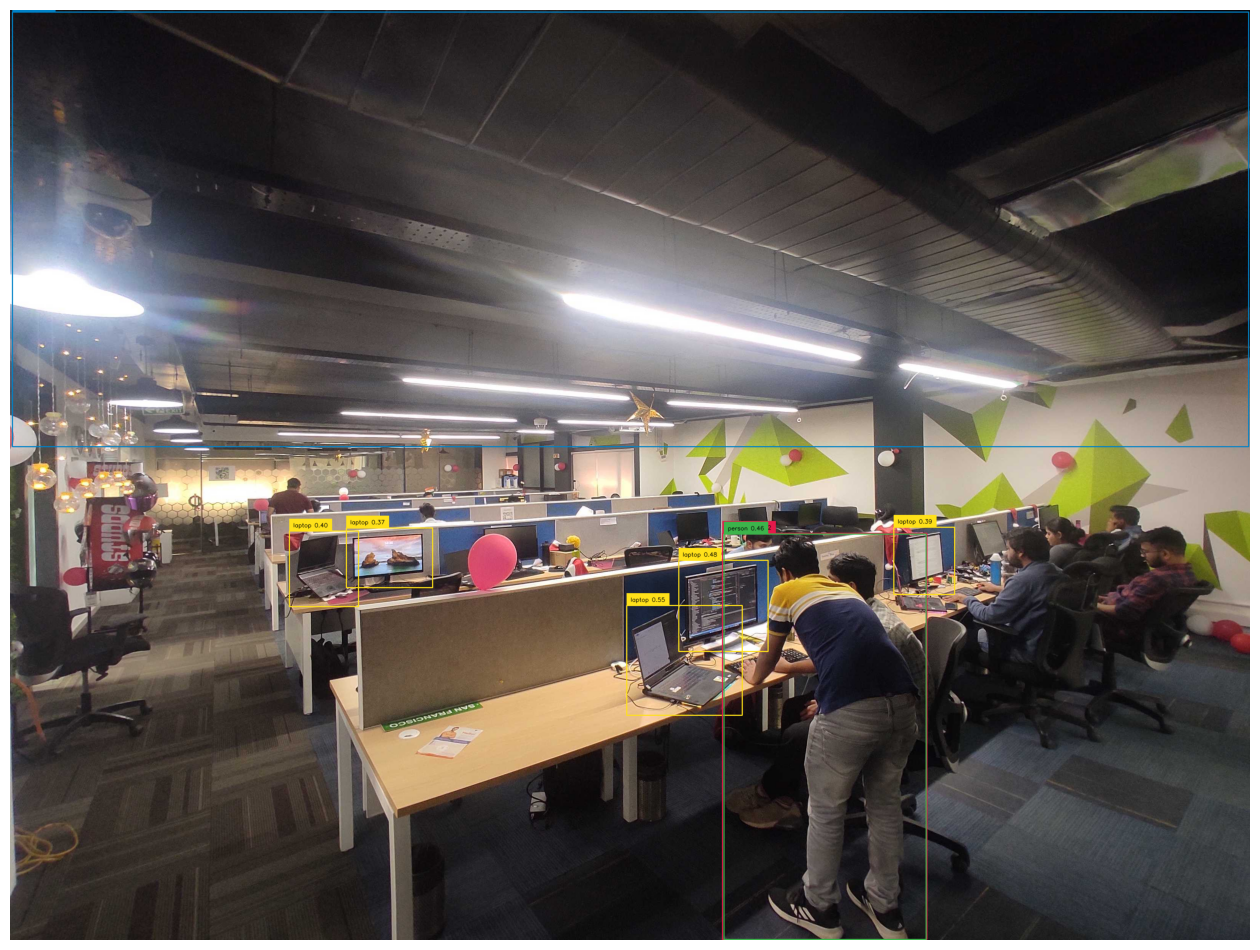

In [31]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)
for i in range(len(detections.class_id)):
    if detections.class_id[i] is None:
        detections.class_id[i] = 0
    print(CLASSES[detections.class_id[i]])
    #print(CLASSES[i])
# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

### Prompting SAM with detected boxes

~~**@team add section about what it means to pass the box and multimask output set to true**~~

**Segment Anything (SAM)** is an image segmentation model.This model can identify the precise location of either specific objects in an image or every object in an image.

**Why SAM + Grounding DINO(Bounding Boxes)?**

In object detection tasks, objects are represented by bounding boxes, which are like drawing a rectangle around the object. These rectangles give a general idea of the object's location, but they don't show the exact shape of the object. They may also include parts of the background or other objects inside the rectangle, making it difficult to separate objects from their surroundings.

Segmentation masks, on the other hand, are like drawing a detailed outline around the object, following its exact shape. This allows for a more precise understanding of the object's shape, size, and position.


<p align="center"><img src="https://lh6.googleusercontent.com/i6SrKMvbbgc6Lq6InX4QEC69f0GtzDYjrKtl09dDtfNLq3GLhF2Q-VnsFOfewoxhODtqeGznVoPuOZMrxGAQV8K2o0HNXpKpO1bL_Ew4-I9eWAIVBp8K5Ik0BGBaPkuEd-_3v1ArkMqEBgkyAY6xOg"></p>

The above image shows the original (left) and segmented (right) image which are results of just using SAM without Grounding DINO (bounding boxes) hence `box = False`.

<p align="center"><img src="https://lh6.googleusercontent.com/udL3bPcuIVyW3HlD8MNviQVDOOSHSkppARKNRR9I7QinBd9nCc2Txj7j8fggVZ5oOUalxP6GAi3oIZWnIcoRBD101-csnyyM07lguyVKfV_Bsse3fCxTtIirDcISZCOjXM9t9j-DiGugWYiaDkAHIw"></p>

The above image shows the original image with bounding box (left) and segmented (right) image using Grounding DINO (bounding boxes) hence `box = True`.

Now we know that given a text prompt and an image, Grounding-DINO can return the most relevant bounding boxes for the given prompt. We also know that given a bounding box and an image, SAM can return the segmented mask inside the bounding box. Now we will stack these two pieces together and given an image and text prompt (which will include our classes) and we will get the segmentation results!


### About multimask_output parameter
The model always outputs 3 masks per image (or per point / per bounding box if relevant). However, it is possible to just output a single mask, that corresponds to the “best” mask, by specifying `multimask_output = False`.

In [32]:
import numpy as np
from segment_anything import SamPredictor


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

~~**@team add a small bit on color correction and image formats. How it matters that the preprocessing step is exactly the same as when the model trains. At the end of the day, its numbers going through transformations. So if R and B interchange places, everything will get messed up. Verify this claim**~~

### Essentials of Image Processing : Color Correction , Image Format

**Color correction** is the process of adjusting the colors of an image to ensure they are accurate and consistent. This involves correcting any color imbalances, adjusting brightness and contrast, and ensuring that the overall color appearance is faithful to the original scene.

**Image formats** refer to the way in which image data is stored and encoded. Common image formats include JPEG, PNG, GIF, BMP, and others. Each format has its own characteristics, compression methods, and capabilities.

#### Consistent Preprocessing:

When training machine learning models, it is essential to preprocess the input data in a consistent manner. This includes tasks such as resizing, normalization, and, in the context of image data, color correction.. If training and testing preprocessing differ, the model may struggle with new data, affecting recognition. Maintaining consistency is vital for better model generalization.


## Why BGR to RGB ?
cv2 by default reads image in BGR format and since the model used are trained with images in RGB format we need to convert BGR to RGB using `cv2. COLOR_BGR2RGB`.

<p align="center"><img src="https://global.discourse-cdn.com/nvidia/original/3X/1/0/1030475fba2bf44161ce7a82a61f2bd7912f271a.png"></p>

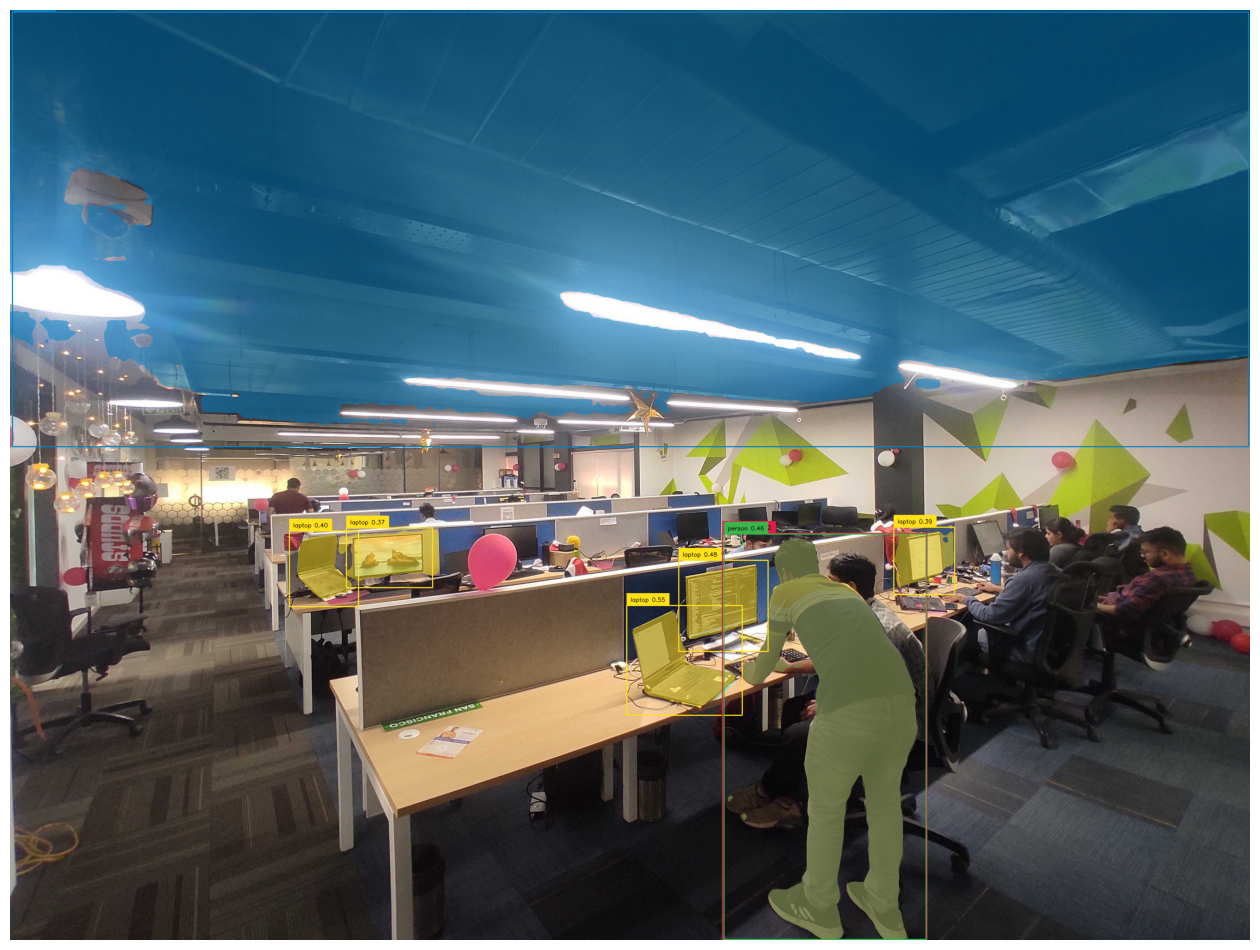

In [33]:
import cv2

# convert detections to masks
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)

annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))


## Generating and Saving the Masks

~~**@team get into the details here. Refer to the PPT notes. What the pipeline is to post process the masks. How we go from a matrix of numbers to actual binary masks. NMS, removing duplicate masks, fixing holes in masks etc.**~~

**Mask** : refers to a binary image that is used to identify and isolate specific objects or regions within an image. The mask is typically created to highlight the areas of interest by assigning a value of 1 to the pixels within the object or region, and 0 to the pixels outside of it.

**Post Processing Pipeline of Masks**
1. Raw Mask Generation:

- SAM first generates raw segmentation masks as matrices of floating-point values between 0 and 1. These values represent the model's confidence that a pixel belongs to the object of interest.
2. Thresholding:

- To create binary masks, SAM applies a threshold to segmentation matrices. Pixels above the threshold are labeled as object (1), below as background (0). Threshold choice impacts segmentation precision and recall, often fine-tuned for specific applications

3. Filtering for Quality:

- SAM produces multiple masks per prompt. Quality assurance involves filtering out masks that are too small, low in confidence, or significantly overlap with others.
4. Non-Maximal Suppression (NMS):

- NMS is a common technique used to reduce duplicate detections in object detection and segmentation tasks. It helps eliminate overlapping masks that likely represent the same object.

<p align="center"><image src="https://lh5.googleusercontent.com/_x63VDXLroRQICm017O8agrQFYoe--OpaJvZy-XRJdUWM5e0dkjS3UnP3ySfLKdfNpqlKZQFLZtcvTaLxh1M92SgsTuvbv1jmBBtlMGgCkQwnV87J1a1IEyetBDfol2Yr7oAitaeexaOVpPsExEIsw" width=400 height=400></p>

5. Formatting and Output:

- The final binary masks are typically represented as NumPy arrays with values of 0 (background) and 1 (object)

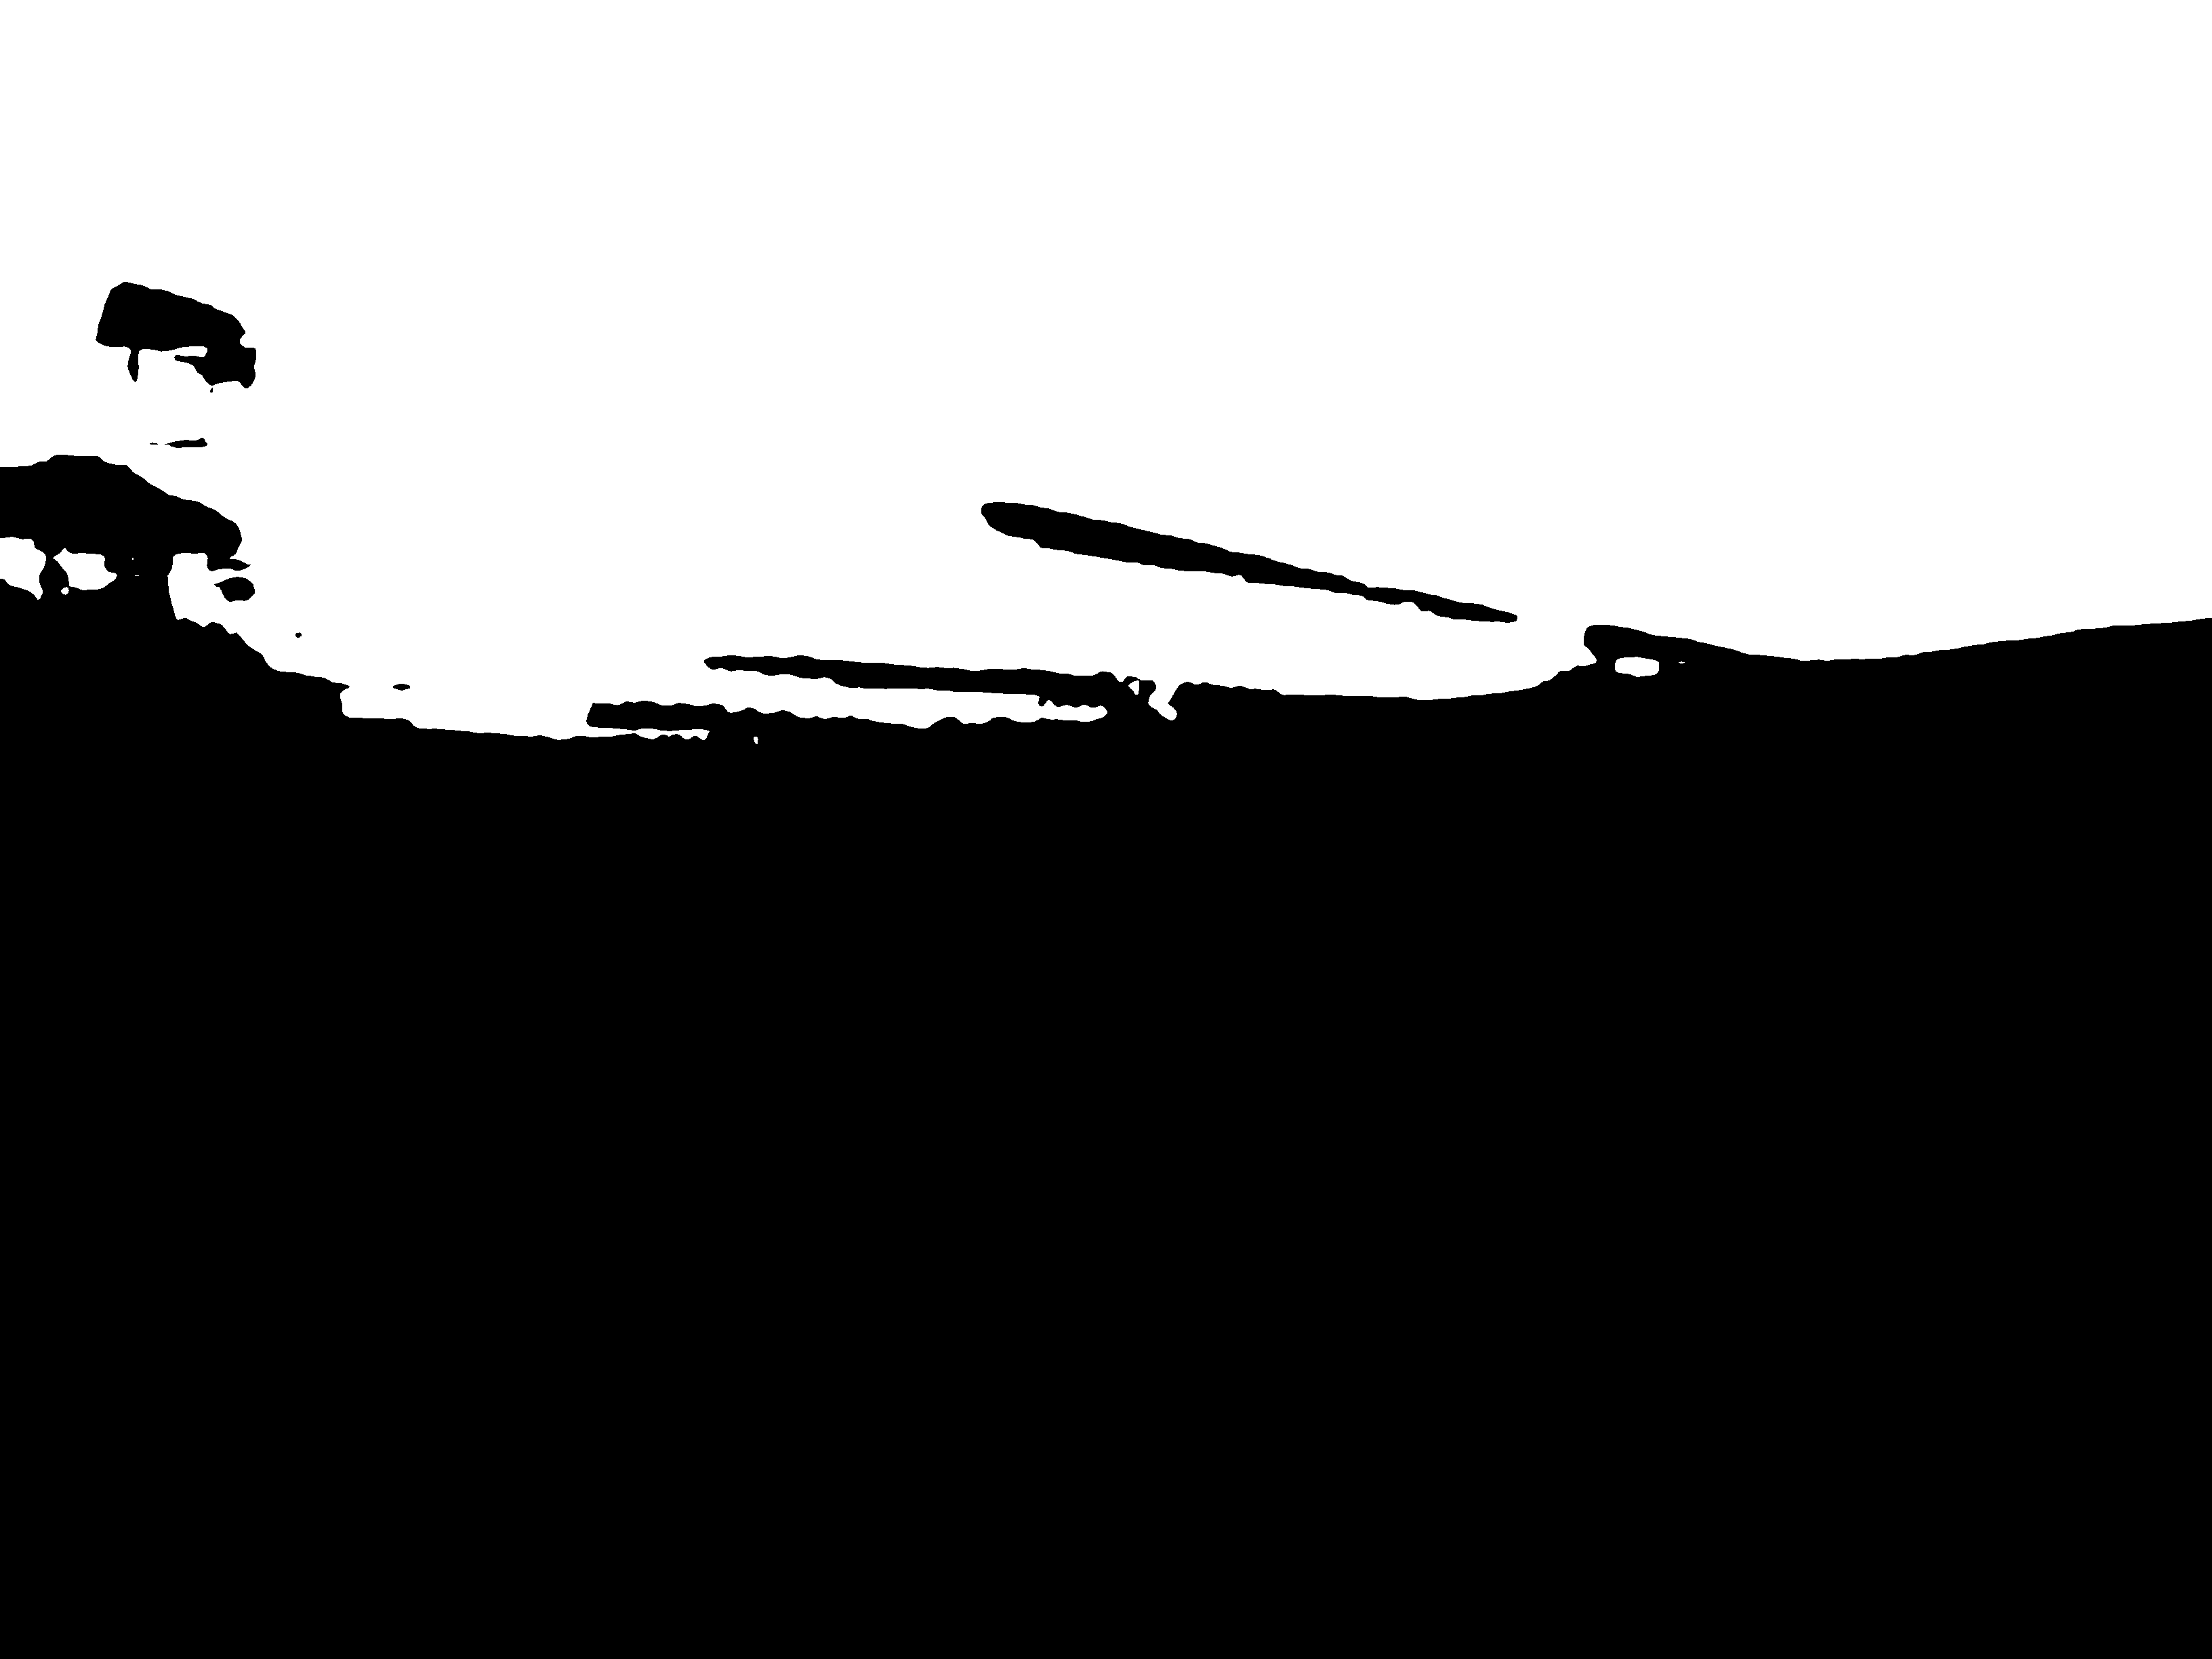

0.4626274


In [34]:
import os
import math
from PIL import Image
from IPython.display import display


grid_size_dimension = math.ceil(math.sqrt(len(detections.mask)))
os.makedirs(MASK_FOLDER_PATH, exist_ok=True)

titles = [CLASSES[class_id] for class_id in detections.class_id]
personDetected  = False
maxConfidence = 0
image_filename = ""

# Plot and save images
for i, (image, title) in enumerate(zip(detections.mask, titles)):
    # Create a Pillow image from the NumPy array

    if(title == seg_class):

      #print(f"{title}: {detections.confidence[i]} {maxConfidence}")

      if(detections.confidence[i]>maxConfidence):
        pillow_image = Image.fromarray((image * 255).astype('uint8'))

        # Display the image in Colab
        display(pillow_image)
        maxConfidence = detections.confidence[i]
        print(maxConfidence)
        # Save the image in the 'mask' folder
        image_filename = f"{MASK_FOLDER_PATH}photo_mask.png"
        personDetected = True
        pillow_image.save(image_filename, dpi=(1200, 1200))


if(personDetected==False):
  print("Person is not detected , take image again.")


# Stable Diffusion Inpainting

~~**@team modify this section so that its not verbatim. Talk about a gen AI. How this model was trainined. What data was used, Ethics, current law suits etc. Change the sample image to something generated by us**~~


## **Stable Diffusion Inpainting Model**
- **Model**: text-to-image generation model

- **Training Data**: Primarily used LAION-2B (en).

- **Model Description**: Generates and modifies images based on text prompts using a Latent Diffusion Model with a fixed, pretrained text encoder (CLIP ViT-L/14).

- **Training Procedure**: Latent diffusion model combining an autoencoder with a diffusion model. Text prompts are encoded through a ViT-L/14 text-encoder, and the loss is a reconstruction objective between the noise added to the latent and the prediction made by the UNet. The training process involved multiple checkpoints with different configurations.

- **Direct Use**: The model is intended for research, art generation, and educational purposes.

- **Limitations**: It has limitations in achieving perfect photorealism, rendering legible text, and handling complex composition tasks. Bias may exist due to the English-centric training data.

- **Misuse, Malicious Use, and Out-of-Scope Use**: The model emphasizes responsible use and discourages harmful content creation. Environmental impact estimates are provided. No current legal issues or lawsuits are mentioned in the provided information.


![](https://raw.githubusercontent.com/suyash-s09/Pravega-Workshop/main/.asset/inpainting.png)

Above figure shows inpainting where the segmented part are clothes and we use it to replace with a golden jacket.

### Importing all the necessary libraries

In [35]:
import inspect
from typing import List, Optional, Union

import numpy as np
import torch
import os
from transformers.utils import *

import PIL
from diffusers import StableDiffusionInpaintPipeline

### Declare Path Variables

In [36]:
PROMPT_IMG_DIR = "/content/drive/MyDrive/data/prompt_images"
IMG_DIR = "/content/drive/MyDrive/data/images"
MASK_DIR = "/content/drive/MyDrive/data/masks"

### Helper functions to load and display the images

In [37]:
def load_image(path):
    return PIL.Image.open(path).convert("RGB")

def invert_image(img):
    img = PIL.ImageOps.invert(img)
    return img

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

def save_images(imgs, prompt):
    if os.path.isdir(f"{PROMPT_IMG_DIR}") == False:
      os.mkdir(f"{PROMPT_IMG_DIR}")
    if os.path.isdir(f"{PROMPT_IMG_DIR}/{prompt}") == False:
      os.mkdir(f"{PROMPT_IMG_DIR}/{prompt}")
    for i in range(len(imgs)):
        imgs[i].save(f"{PROMPT_IMG_DIR}/{prompt}/{prompt}_{i+1}.png")

def delete_prompt_dir(prompt):
    if os.path.isdir(f"{PROMPT_IMG_DIR}/{prompt}") == True:
      !rm -r "{PROMPT_IMG_DIR}/{prompt}"

~~**@team Explain every single parameter below. Everyone involved in this project should understnad each and every one of these paramenters in the pipeline.**~~

**We should show how the output changes if this changes. Especially the safety checker. Add more cells experimenting with this.**

# **Pipeline Parameters**
- tokenizer (CLIPTokenizer) — Breaking down each word into sub-words and then using a lookup table to convert them into a number

- text_encoder (CLIPTextModel) — Takes the tokens generated by the tokenizer as an input and generates text embeddings that are close in latent space as it may be if you would have encoded an image through a CLIP model.(clip-vit-large-patch14).

- vae ([AutoencoderKL, AsymmetricAutoencoderKL]) — Variational Auto-Encoder (VAE) Model to encode and decode images to and from latent representations. They are a type of generative model that leverages probabilistic encoding in a lower-dimensional latent space. the reason we use VAE is to reduce the computational time.

- UNET (UNet2DConditionModel) — It takes two inputs:
  - Noise - Noisy latents are latents produced by a VAE encoder (in case an initial image is provided) with added noise
  - Text embeddings - CLIP-based embedding generated by input textual prompts
- it predicts the noise which is subtracted from the noisy latents to return the original de-noised latents

- scheduler (SchedulerMixin) — The purpose of a scheduler is to determine how much noise to add to the latent at a given step in the diffusion process. Can be one of DDIMScheduler,
LMSDiscreteScheduler, or PNDMScheduler.

- safety_checker (StableDiffusionSafetyChecker) — Classification module that estimates whether generated images could be considered offensive or harmful.

- feature_extractor (CLIPImageProcessor) — A CLIPImageProcessor to extract features from generated images; used as inputs to the safety_checker.

![](https://raw.githubusercontent.com/suyash-s09/Pravega-Workshop/main/.asset/stable_diffusion.png)

In [38]:
from diffusers import AsymmetricAutoencoderKL, LMSDiscreteScheduler

In [40]:
device = "cuda"
model_path = "runwayml/stable-diffusion-inpainting"

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
).to(device)

vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


### Define image and mask path

In [41]:
image_path = f"{IMG_DIR}/photo.jpg"
mask_path = f"{MASK_DIR}/photo_mask.png"

~~**@team add a small section on how we are chaining multiple models together. Talk about how modern day AI solutions usually have multiple models chained together. Mention about model ensembling**~~
### **Model Chaining/Pipelining**

 - In this workshop, we have used a total of three models which are chained to work together. Each models output becomes an input for the other model.
 - Basically, what we have done is chain independent models in a pipeline.
 - It has many advantages like scalability and flexibility with different parts of the model.
 - Today, most of the AI solutions use model chaining to make Multi-Modal Models catering to many modalities.

### Loading and Resizing Original and Masked Image

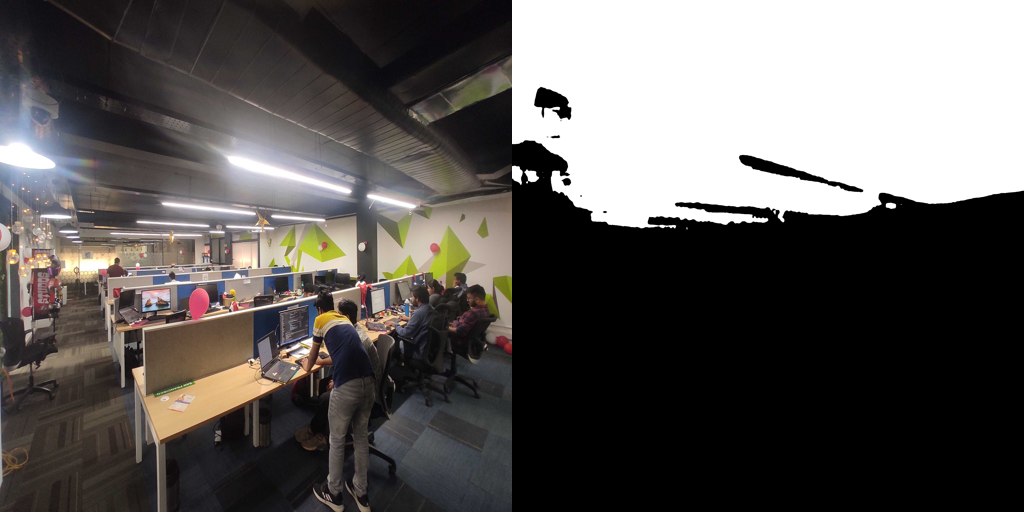

In [42]:
image = load_image(image_path).resize((512,512))
mask_image = load_image(mask_path).convert('L').resize((512,512))
image_grid([image, mask_image], 1, 2)

### **Model Parameters**
- prompt (str or List[str], optional) — The prompt or prompts to guide image generation.
- image — image which will be used with the mask image
- mask_image — White pixels in the mask are repainted while black pixels are preserved
- guidance_scale — encourages the model to generate images closely linked to the text prompt (default = 7.5)
- num_inference_steps — number of iterations for denoising
- generator — generate using which device cpu/gpu

### Initializing the input parameters for the model

In [62]:
inpaint_prompt =input("Enter a prompt: ") # prompt to inpaint the segmented part
guidance_scale = 7.5 # encourages the model to generate images closely linked to the text prompt (default = 7.5)
num_samples = 3 # number of samples to be generated
generator = torch.Generator(device="cuda") # generate using which device cpu/gpu
generator = generator.manual_seed(10) # change the seed to get different results

Enter a prompt: spaceship


~~**@team add a small section about the size of the model. The cost of running this. The GPU used etc. Mention some costs of these GPUs and running these machines on cloud. Explain how even though these models are "free" and open to use, some of them need a large initial capital. Also mention that alternatively there are hyper provisioned services like hugging face,Open AI, which allows to pay per API call**~~

### According to information given on Hugging face,

- Dataset used in the training of the model was LAION-2B (en) which was around 100 TB's in size!!!.
- Hardware used was 32 x 8 x A100 PCIe 80GB on AWS Cloud Services and was trained for 15000 Hours!!!
- According to [Gcore](https://gcore.com/cloud/ai-gpu), 8 x A100 PCIe 80GB costs around 16$/hour. So if we calculate based on the information given above, it costed around 32 x 16 x 15000 = 7.68 Million Dollars to train this model.

### Models are free to use, but need a lot of initial capital

- Now you can't invest that kind of money just to train a model, i.e. why services like Open AI and Hugging face exists which provide services to access highly provisoned models on subscription basis.

In [63]:
prompt_images = pipeline(
    prompt = inpaint_prompt,
    image = image,
    mask_image = mask_image,
    guidance_scale = guidance_scale,
    generator = generator,
    num_images_per_prompt = num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

### Display the prompt images

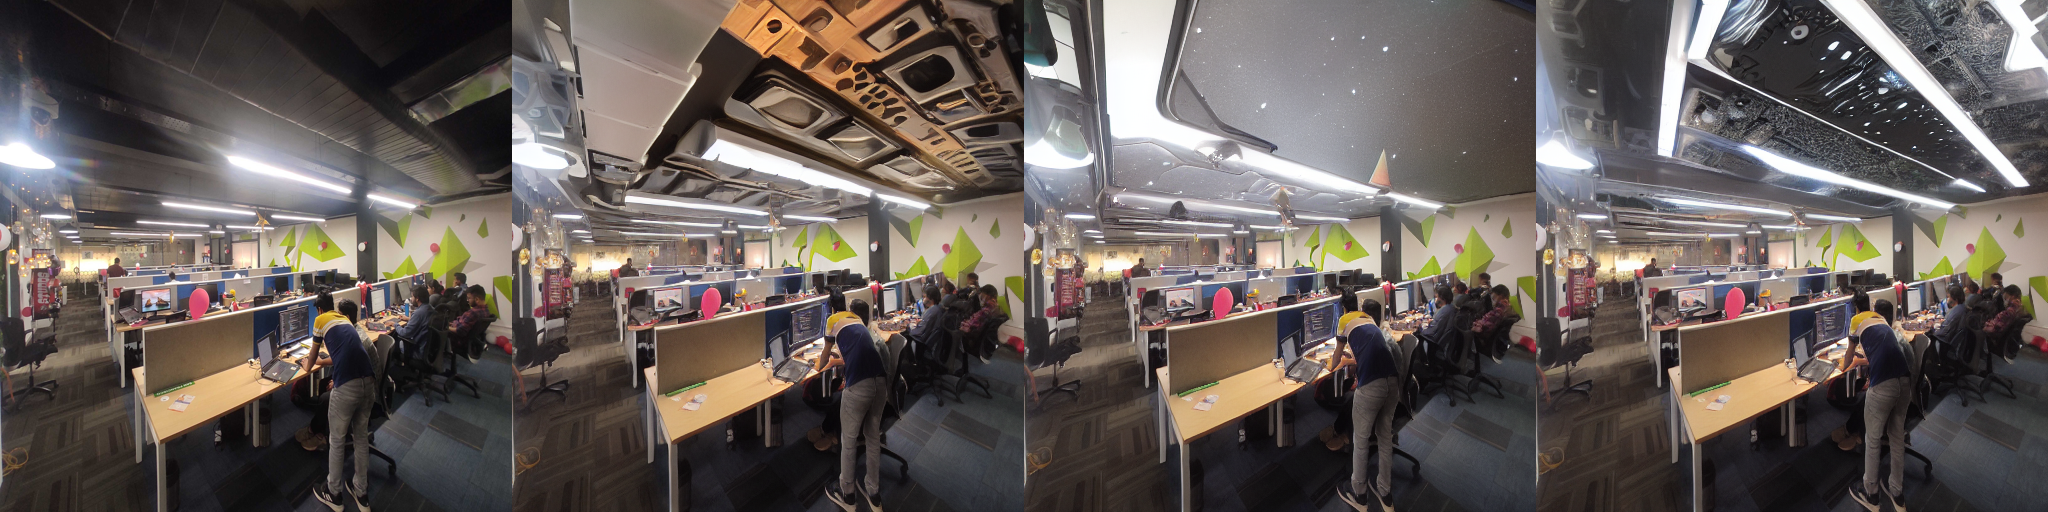

In [64]:
prompt_images.insert(0, image) # insert initial image in the list so we can compare side by side
image_grid(prompt_images, 1, num_samples + 1)

### Save the images

In [65]:
save_prompt = input("To save the images press y: ")
if save_prompt == "y":
    save_images(prompt_images, inpaint_prompt) # saves images with naming convention {prompt}_{image_index}.png

To save the images press y: y


### Now what if you want change the background of the image, not the person?

~~**@team add a small section on how post processing is upto the application. Give different usecases as to why what we are doing below maybe useful. eg: Retail shopping. You dont have to go to the shop to try out clothes**~~

- The processing of the mask is dependent on the specific application we are targeting.
- Maybe you just want to fill in some missing parts of an image, maybe you want to try on some clothing at a store, maybe you want to try out some ideas
- These all cases can be covered as different features to be added further to the application.

### Inverting the image to choose background to be inpainted

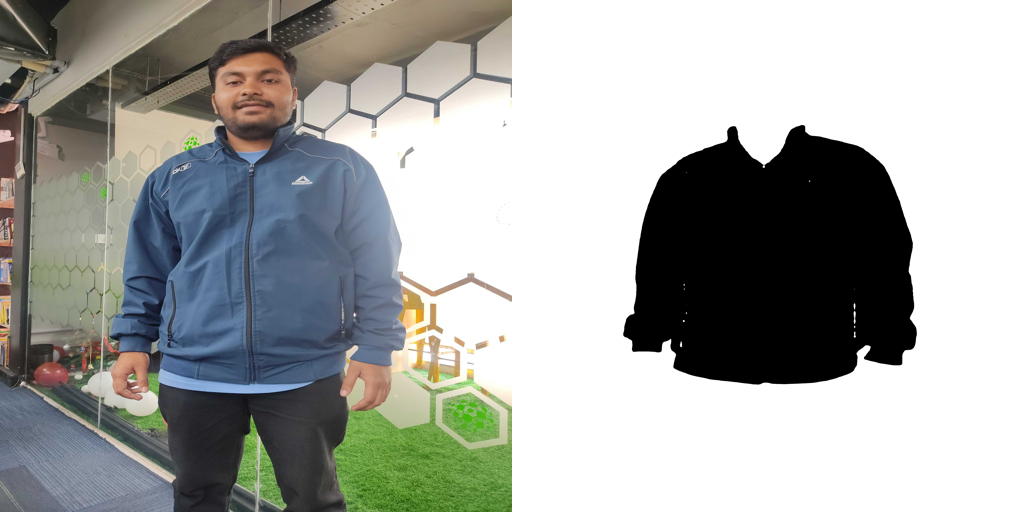

In [ ]:
mask_image = invert_image(mask_image)
image_grid([image, mask_image], 1, 2)

### Initializing the input parameters for the model

In [ ]:
inpaint_prompt = input("Enter a prompt: ") # prompt to inpaint the segmented part
guidance_scale = 7.5 # encourages the model to generate images closely linked to the text prompt (default = 7.5)
num_samples = 3 # number of samples to be generated
generator = torch.Generator(device="cuda") # generate using which device cpu/gpu
generator = generator.manual_seed(0) # change the seed to get different results

Enter a prompt: santa claus


### Generating images using the above parameters

In [ ]:
prompt_images = pipeline(
    prompt = inpaint_prompt,
    image = image,
    mask_image = mask_image,
    guidance_scale = guidance_scale,
    generator = generator,
    num_images_per_prompt = num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

### Display the prompt images

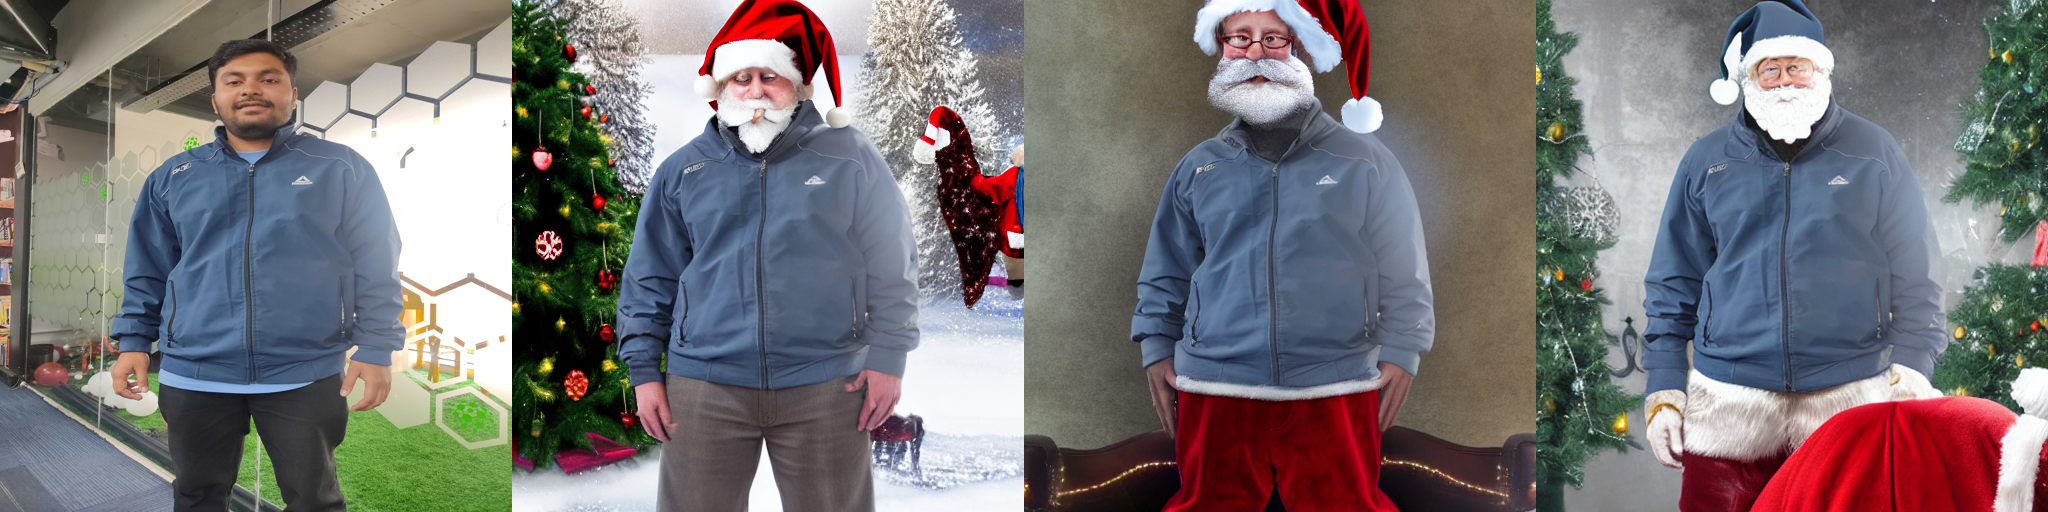

In [ ]:
prompt_images.insert(0, image) # insert initial image in the list so we can compare side by side
image_grid(prompt_images, 1, num_samples + 1)

### Save the images

In [ ]:
save_prompt = input("To save the images press y: ")
if save_prompt == "y":
    print("Images saved successfully...")
    save_images(prompt_images, inpaint_prompt) # saves images with naming convention {prompt}_{image_index}.png

To save the images press y: y
Images saved successfully...
